<a href="https://colab.research.google.com/github/anushkaxp/Gold-price-prediction/blob/main/Silver%20Price%20Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Problem Statement**: *By running data from the previous five years through a variety of algorithms, one may estimate the high price of silver for the current day*.

ML models used: Linear regression,Decision tree,KNN and Random forest.

In [ ]:
#imported required libraries
import warnings
warnings.filterwarnings('ignore')

import os
import shutil
import datetime
import gc
from tqdm import tqdm
import plotly.express as px

import pandas as pd
import numpy as np
from numpy import median

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')

from sklearn.manifold import TSNE
from sklearn import preprocessing

from collections import Counter

import string
import re
from nltk.corpus import stopwords

import scipy
from scipy import hstack


from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score


from sklearn.metrics import mean_squared_error as mse
from math import sqrt
from sklearn.linear_model import Ridge

from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import log_loss
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import RandomizedSearchCV 
from scipy.stats import randint as sp_randint
from scipy.stats import uniform

All the required '61' datasets of past 5 years are uploaded at once.

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving trading-statistics-feb-2018.xlsx to trading-statistics-feb-2018.xlsx
Saving trading-statistics-mar-2018.xlsx to trading-statistics-mar-2018.xlsx
Saving trading-statistics-apr-2018.xlsx to trading-statistics-apr-2018.xlsx
Saving trading-statistics-may-2018.xlsx to trading-statistics-may-2018.xlsx
Saving trading-statistics-jul-2018.xlsx to trading-statistics-jul-2018.xlsx
Saving trading-statistics-aug-2018.xlsx to trading-statistics-aug-2018.xlsx
Saving trading-statistics-sep-2018.xlsx to trading-statistics-sep-2018.xlsx
Saving trading-statistics-oct-2018.xlsx to trading-statistics-oct-2018.xlsx
Saving trading-statistics-nov-2018.xlsx to trading-statistics-nov-2018.xlsx
Saving trading-statistics-jan-2019.xlsx to trading-statistics-jan-2019.xlsx
Saving trading-statistics-feb-2019.xlsx to trading-statistics-feb-2019.xlsx
Saving trading-statistics-mar-2019.xlsx to trading-statistics-mar-2019.xlsx
Saving trading-statistics-apr-2019.xlsx to trading-statistics-apr-2019.xlsx
Saving tradi

line of the code lists all the files in the current working directory using the listdir() method from the os module and assigns them to the variable files.

In [ ]:
path = os.getcwd()
files = os.listdir(path)
files

['.config',
 'trading-statistics.xlsx',
 'trading-statistics-oct-2018.xlsx',
 'trading-statistics-jul-2018.xlsx',
 'trading-statistics-nov-2019.xlsx',
 'trading-statistics-jul-2021.xlsx',
 'trading-statistics-mar-2023.xlsx',
 'trading-statistics-nov-2018.xlsx',
 'trading-statistics-aug-2020.xlsx',
 'trading-statistics-apr-2019.xlsx',
 'trading-statistics-oct-2019.xlsx',
 'trading-statistics-jan-2023.xlsx',
 'trading-statistics-jan-2020.xlsx',
 'trading-statistics-may-2022.xlsx',
 'trading-statistics-oct-2022.xlsx',
 'trading-statistics-feb-2020.xlsx',
 'trading-statistics-jul-2022.xlsx',
 'trading-statistics-aug-2022.xlsx',
 'trading-statistics-aug-2019.xlsx',
 'trading-statistics-november-2022.xlsx',
 'trading-statistics-sep-2022.xlsx',
 'trading-statistics-feb-2018.xlsx',
 'trading-statistics-jan-2022.xlsx',
 'trading-statistics-may-2021.xlsx',
 'trading-statistics-oct-2020.xlsx',
 'trading-statistics-june-2022.xlsx',
 'trading-statistics-dec-2019.xlsx',
 'trading-statistics-mar-2019

In [ ]:
# Checking whether all the files are in 'xlsx' format only.
files_xlsx = [f for f in files if f[-4:] == "xlsx"]
files_xlsx

['trading-statistics.xlsx',
 'trading-statistics-oct-2018.xlsx',
 'trading-statistics-jul-2018.xlsx',
 'trading-statistics-nov-2019.xlsx',
 'trading-statistics-jul-2021.xlsx',
 'trading-statistics-mar-2023.xlsx',
 'trading-statistics-nov-2018.xlsx',
 'trading-statistics-aug-2020.xlsx',
 'trading-statistics-apr-2019.xlsx',
 'trading-statistics-oct-2019.xlsx',
 'trading-statistics-jan-2023.xlsx',
 'trading-statistics-jan-2020.xlsx',
 'trading-statistics-may-2022.xlsx',
 'trading-statistics-oct-2022.xlsx',
 'trading-statistics-feb-2020.xlsx',
 'trading-statistics-jul-2022.xlsx',
 'trading-statistics-aug-2022.xlsx',
 'trading-statistics-aug-2019.xlsx',
 'trading-statistics-november-2022.xlsx',
 'trading-statistics-sep-2022.xlsx',
 'trading-statistics-feb-2018.xlsx',
 'trading-statistics-jan-2022.xlsx',
 'trading-statistics-may-2021.xlsx',
 'trading-statistics-oct-2020.xlsx',
 'trading-statistics-june-2022.xlsx',
 'trading-statistics-dec-2019.xlsx',
 'trading-statistics-mar-2019.xlsx',
 'tr

In [ ]:
#Appending all the datasets into df
df = pd.DataFrame()
for f in files_xlsx:
    data = pd.read_excel(f)
    df = df.append(data)

In [ ]:
# printing appended df
df

,Year,Month,Date,Derivative segment,Instrument Type,Name of the commodity,Symbol,Expiry Date,Price unit,Option Type,...,Spot Price for basis variety (in Rs)*,Premium Turnover (in Rs),Notional Turnover (Options)/ Turnover (Futures) (in Rs),Trading Volume (In Lots),Open Interest \n(In Lots),Lot size and unit,Open Interest (Options Notional Basis) / Open Interest (Futures) (in Rs),No.of trades,Mode of Trading (% of Turnover),Unnamed: 25
0,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaT,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaT,Equity Derivatives/ Currency Derivatives/ Inte...,Equity Index Future/ Stock Future/ Equity Inde...,NaN,NaN,NaT,NaN,Call Option/ Put Option,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ALGO,Non-ALGO
2,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaT,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020,Mar,2020-03-02,Commodity Derivatives,FUTCOM,ALUMINIUM MINI,ALUMINI,2020-03-31,1 KGS,N.A.,...,139.1,-,1730445000,12537,4375,1 MT,606375000.0,8036,20.607302,79.392698
4,2020,Mar,2020-03-02,Commodity Derivatives,FUTCOM,ALUMINIUM MINI,ALUMINI,2020-04-30,1 KGS,N.A.,...,139.1,-,60804550,439,201,1 MT,27979200.0,408,40.778322,59.221678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4945,Note:,NaN,NaT,NaN,NaN,NaN,NaN,NaT,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4946,Contracts with no volume and no Open Interest ...,NaN,NaT,NaN,NaN,NaN,NaN,NaT,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4947,Spot price is not provided in case of Option C...,NaN,NaT,NaN,NaN,NaN,NaN,NaT,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4948,In case of international referenceable commodi...,NaN,NaT,NaN,NaN,NaN,NaN,NaT,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df

,Year,Month,Date,Derivative segment,Instrument Type,Name of the commodity,Symbol,Expiry Date,Price unit,Option Type,...,Spot Price for basis variety (in Rs)*,Premium Turnover (in Rs),Notional Turnover (Options)/ Turnover (Futures) (in Rs),Trading Volume (In Lots),Open Interest \n(In Lots),Lot size and unit,Open Interest (Options Notional Basis) / Open Interest (Futures) (in Rs),No.of trades,Mode of Trading (% of Turnover),Unnamed: 25
3,2020,Mar,2020-03-02,Commodity Derivatives,FUTCOM,ALUMINIUM MINI,ALUMINI,2020-03-31,1 KGS,N.A.,...,139.1,-,1730445000,12537,4375,1 MT,606375000.0,8036,20.607302,79.392698
4,2020,Mar,2020-03-02,Commodity Derivatives,FUTCOM,ALUMINIUM MINI,ALUMINI,2020-04-30,1 KGS,N.A.,...,139.1,-,60804550,439,201,1 MT,27979200.0,408,40.778322,59.221678
5,2020,Mar,2020-03-02,Commodity Derivatives,FUTCOM,ALUMINIUM,ALUMINIUM,2020-05-29,1 KGS,N.A.,...,139.1,-,-,-,6,1 MT,838500.0,-,-,-
6,2020,Mar,2020-03-02,Commodity Derivatives,FUTCOM,CARDAMOM,CARDAMOM,2020-03-13,1 KGS,N.A.,...,3062.5,-,2228440,8,60,100 KGS,16713600.0,8,-,100
7,2020,Mar,2020-03-02,Commodity Derivatives,FUTCOM,CARDAMOM,CARDAMOM,2020-04-15,1 KGS,N.A.,...,3062.5,-,1151330,4,58,100 KGS,16694140.0,4,-,100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4945,Note:,NaN,NaT,NaN,NaN,NaN,NaN,NaT,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4946,Contracts with no volume and no Open Interest ...,NaN,NaT,NaN,NaN,NaN,NaN,NaT,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4947,Spot price is not provided in case of Option C...,NaN,NaT,NaN,NaN,NaN,NaN,NaT,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4948,In case of international referenceable commodi...,NaN,NaT,NaN,NaN,NaN,NaN,NaT,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.Symbol.describe()

count     332279
unique        33
top       SILVER
freq       62465
Name: Symbol, dtype: object

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 332635 entries, 3 to 4949
Data columns (total 26 columns):
 #   Column                                                                    Non-Null Count   Dtype         
---  ------                                                                    --------------   -----         
 0   Year                                                                      332573 non-null  object        
 1   Month                                                                     332279 non-null  object        
 2   Date                                                                      332279 non-null  datetime64[ns]
 3   Derivative segment                                                        332279 non-null  object        
 4   Instrument Type                                                           332279 non-null  object        
 5   Name of the commodity                                                     332192 non-null  object        
 6 

In [ ]:
df.describe().T.style.set_properties(**{"background-color": "#AB8111", "font-size" : "17px",
                                        "color": "#ffffff", "border-radius" : "1px", "border": "1.5px solid black"})

,count,mean,std,min,25%,50%,75%,max
Close Price (In Rs),332279.000000,4970.392571,13066.980943,0.010000,41.300000,349.100000,1924.500000,84120.000000
Clearing/Daily Settlement price,332279.000000,4971.261274,13065.974867,-2884.000000,44.350000,353.500000,1926.500000,84120.000000


In [ ]:
# replacing nan values with 0
df.fillna(value = 0,inplace = True)
print(df)

                                                   Year Month  \
3                                                  2020   Mar   
4                                                  2020   Mar   
5                                                  2020   Mar   
6                                                  2020   Mar   
7                                                  2020   Mar   
...                                                 ...   ...   
4945                                              Note:     0   
4946  Contracts with no volume and no Open Interest ...     0   
4947  Spot price is not provided in case of Option C...     0   
4948  In case of international referenceable commodi...     0   
4949  All the base metal contracts were converted to...     0   

                     Date     Derivative segment Instrument Type  \
3     2020-03-02 00:00:00  Commodity Derivatives          FUTCOM   
4     2020-03-02 00:00:00  Commodity Derivatives          FUTCOM   
5     2020-03-0

In [ ]:
# printing replaced nan
df

,Year,Month,Date,Derivative segment,Instrument Type,Name of the commodity,Symbol,Expiry Date,Price unit,Option Type,...,Spot Price for basis variety (in Rs)*,Premium Turnover (in Rs),Notional Turnover (Options)/ Turnover (Futures) (in Rs),Trading Volume (In Lots),Open Interest \n(In Lots),Lot size and unit,Open Interest (Options Notional Basis) / Open Interest (Futures) (in Rs),No.of trades,Mode of Trading (% of Turnover),Unnamed: 25
3,2020,Mar,2020-03-02 00:00:00,Commodity Derivatives,FUTCOM,ALUMINIUM MINI,ALUMINI,2020-03-31 00:00:00,1 KGS,N.A.,...,139.1,-,1730445000,12537,4375,1 MT,606375000.0,8036,20.607302,79.392698
4,2020,Mar,2020-03-02 00:00:00,Commodity Derivatives,FUTCOM,ALUMINIUM MINI,ALUMINI,2020-04-30 00:00:00,1 KGS,N.A.,...,139.1,-,60804550,439,201,1 MT,27979200.0,408,40.778322,59.221678
5,2020,Mar,2020-03-02 00:00:00,Commodity Derivatives,FUTCOM,ALUMINIUM,ALUMINIUM,2020-05-29 00:00:00,1 KGS,N.A.,...,139.1,-,-,-,6,1 MT,838500.0,-,-,-
6,2020,Mar,2020-03-02 00:00:00,Commodity Derivatives,FUTCOM,CARDAMOM,CARDAMOM,2020-03-13 00:00:00,1 KGS,N.A.,...,3062.5,-,2228440,8,60,100 KGS,16713600.0,8,-,100
7,2020,Mar,2020-03-02 00:00:00,Commodity Derivatives,FUTCOM,CARDAMOM,CARDAMOM,2020-04-15 00:00:00,1 KGS,N.A.,...,3062.5,-,1151330,4,58,100 KGS,16694140.0,4,-,100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4945,Note:,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4946,Contracts with no volume and no Open Interest ...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4947,Spot price is not provided in case of Option C...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4948,In case of international referenceable commodi...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
print('Shape of data: ', df.shape)

Shape of data:  (332635, 26)


In [ ]:
#replaced 'N.A' values with 0 in Option Type column and printing first 5 rows
df['Option Type']=df['Option Type'].replace('N.A.',0)
df.head(5)

,Year,Month,Date,Derivative segment,Instrument Type,Name of the commodity,Symbol,Expiry Date,Price unit,Option Type,...,Spot Price for basis variety (in Rs)*,Premium Turnover (in Rs),Notional Turnover (Options)/ Turnover (Futures) (in Rs),Trading Volume (In Lots),Open Interest \n(In Lots),Lot size and unit,Open Interest (Options Notional Basis) / Open Interest (Futures) (in Rs),No.of trades,Mode of Trading (% of Turnover),Unnamed: 25
3,2020,Mar,2020-03-02 00:00:00,Commodity Derivatives,FUTCOM,ALUMINIUM MINI,ALUMINI,2020-03-31 00:00:00,1 KGS,0,...,139.1,-,1730445000,12537,4375,1 MT,606375000.0,8036,20.607302,79.392698
4,2020,Mar,2020-03-02 00:00:00,Commodity Derivatives,FUTCOM,ALUMINIUM MINI,ALUMINI,2020-04-30 00:00:00,1 KGS,0,...,139.1,-,60804550,439,201,1 MT,27979200.0,408,40.778322,59.221678
5,2020,Mar,2020-03-02 00:00:00,Commodity Derivatives,FUTCOM,ALUMINIUM,ALUMINIUM,2020-05-29 00:00:00,1 KGS,0,...,139.1,-,-,-,6,1 MT,838500.0,-,-,-
6,2020,Mar,2020-03-02 00:00:00,Commodity Derivatives,FUTCOM,CARDAMOM,CARDAMOM,2020-03-13 00:00:00,1 KGS,0,...,3062.5,-,2228440,8,60,100 KGS,16713600.0,8,-,100
7,2020,Mar,2020-03-02 00:00:00,Commodity Derivatives,FUTCOM,CARDAMOM,CARDAMOM,2020-04-15 00:00:00,1 KGS,0,...,3062.5,-,1151330,4,58,100 KGS,16694140.0,4,-,100


In [ ]:
#printing all the duplicate values present in the dataframe.
df[df.duplicated()]

,Year,Month,Date,Derivative segment,Instrument Type,Name of the commodity,Symbol,Expiry Date,Price unit,Option Type,...,Spot Price for basis variety (in Rs)*,Premium Turnover (in Rs),Notional Turnover (Options)/ Turnover (Futures) (in Rs),Trading Volume (In Lots),Open Interest \n(In Lots),Lot size and unit,Open Interest (Options Notional Basis) / Open Interest (Futures) (in Rs),No.of trades,Mode of Trading (% of Turnover),Unnamed: 25
5708,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5709,Note:,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5710,Contracts with no volume and no Open Interest ...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5711,Spot price is not provided in case of Option C...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5712,In case of international referenceable commodi...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4945,Note:,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4946,Contracts with no volume and no Open Interest ...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4947,Spot price is not provided in case of Option C...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4948,In case of international referenceable commodi...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Replacing columns names containing '[#,@,&,(,),-]' with '_'
df.columns = [c.replace(' ', '_') for c in df.columns]
df.columns = df.columns.str.replace('[#,@,&,(,),-]', '')
df = df.replace('-',np.nan)
df = df.replace('',np.nan)
df.head(10)

,Year,Month,Date,Derivative_segment,Instrument_Type,Name_of_the_commodity,Symbol,Expiry_Date,Price_unit,Option_Type,...,Spot_Price_for_basis_variety_in_Rs*,Premium_Turnover_in_Rs,Notional_Turnover___Options/_Turnover_Futures_in_Rs,Trading_Volume_In_Lots,Open_Interest_\nIn_Lots,Lot_size_and_unit,Open_Interest_Options_Notional_Basis_/_Open_Interest_Futures_in_Rs,No.of_trades,Mode_of_Trading_%_of_Turnover,Unnamed:_25
3,2020,Mar,2020-03-02 00:00:00,Commodity Derivatives,FUTCOM,ALUMINIUM MINI,ALUMINI,2020-03-31 00:00:00,1 KGS,0,...,139.1,NaN,1.730445e+09,12537.0,4375.0,1 MT,606375000.0,8036.0,20.607302,79.392698
4,2020,Mar,2020-03-02 00:00:00,Commodity Derivatives,FUTCOM,ALUMINIUM MINI,ALUMINI,2020-04-30 00:00:00,1 KGS,0,...,139.1,NaN,6.080455e+07,439.0,201.0,1 MT,27979200.0,408.0,40.778322,59.221678
5,2020,Mar,2020-03-02 00:00:00,Commodity Derivatives,FUTCOM,ALUMINIUM,ALUMINIUM,2020-05-29 00:00:00,1 KGS,0,...,139.1,NaN,NaN,NaN,6.0,1 MT,838500.0,NaN,NaN,NaN
6,2020,Mar,2020-03-02 00:00:00,Commodity Derivatives,FUTCOM,CARDAMOM,CARDAMOM,2020-03-13 00:00:00,1 KGS,0,...,3062.5,NaN,2.228440e+06,8.0,60.0,100 KGS,16713600.0,8.0,NaN,100.000000
7,2020,Mar,2020-03-02 00:00:00,Commodity Derivatives,FUTCOM,CARDAMOM,CARDAMOM,2020-04-15 00:00:00,1 KGS,0,...,3062.5,NaN,1.151330e+06,4.0,58.0,100 KGS,16694140.0,4.0,NaN,100.000000
8,2020,Mar,2020-03-02 00:00:00,Commodity Derivatives,FUTCOM,CARDAMOM,CARDAMOM,2020-05-15 00:00:00,1 KGS,0,...,3062.5,NaN,NaN,NaN,4.0,100 KGS,1160000.0,NaN,NaN,NaN
9,2020,Mar,2020-03-02 00:00:00,Commodity Derivatives,OPTFUT,COPPER,COPPER,2020-03-20 00:00:00,1 KGS,CE,...,NaN,NaN,NaN,NaN,1.0,2500 KGS,1076525.0,NaN,NaN,NaN
10,2020,Mar,2020-03-02 00:00:00,Commodity Derivatives,OPTFUT,COPPER,COPPER,2020-03-20 00:00:00,1 KGS,CE,...,NaN,16650.0,1.079150e+06,1.0,2.0,2500 KGS,2158300.0,1.0,50.000000,50.000000
11,2020,Mar,2020-03-02 00:00:00,Commodity Derivatives,OPTFUT,COPPER,COPPER,2020-03-20 00:00:00,1 KGS,CE,...,NaN,45850.0,4.345850e+06,4.0,7.0,2500 KGS,7605325.0,4.0,12.491227,87.508773
12,2020,Mar,2020-03-02 00:00:00,Commodity Derivatives,OPTFUT,COPPER,COPPER,2020-03-20 00:00:00,1 KGS,CE,...,NaN,5850.0,1.093350e+06,1.0,1.0,2500 KGS,1093350.0,1.0,100.000000,NaN


In [ ]:
df.columns = [c.replace(' ', '_') for c in df.columns]
df.columns = df.columns.str.replace('[#,@,&,(,),-]', '')
df = df.replace('-',np.nan)
df = df.replace('',np.nan)
df.head(10)

,Year,Month,Date,Derivative_segment,Instrument_Type,Name_of_the_commodity,Symbol,Expiry_Date,Price_unit,Option_Type,...,Spot_Price_for_basis_variety_in_Rs*,Premium_Turnover_in_Rs,Notional_Turnover___Options/_Turnover_Futures_in_Rs,Trading_Volume_In_Lots,Open_Interest_\nIn_Lots,Lot_size_and_unit,Open_Interest_Options_Notional_Basis_/_Open_Interest_Futures_in_Rs,No.of_trades,Mode_of_Trading_%_of_Turnover,Unnamed:_25
3,2020,Mar,2020-03-02 00:00:00,Commodity Derivatives,FUTCOM,ALUMINIUM MINI,ALUMINI,2020-03-31 00:00:00,1 KGS,0,...,139.1,NaN,1.730445e+09,12537.0,4375.0,1 MT,606375000.0,8036.0,20.607302,79.392698
4,2020,Mar,2020-03-02 00:00:00,Commodity Derivatives,FUTCOM,ALUMINIUM MINI,ALUMINI,2020-04-30 00:00:00,1 KGS,0,...,139.1,NaN,6.080455e+07,439.0,201.0,1 MT,27979200.0,408.0,40.778322,59.221678
5,2020,Mar,2020-03-02 00:00:00,Commodity Derivatives,FUTCOM,ALUMINIUM,ALUMINIUM,2020-05-29 00:00:00,1 KGS,0,...,139.1,NaN,NaN,NaN,6.0,1 MT,838500.0,NaN,NaN,NaN
6,2020,Mar,2020-03-02 00:00:00,Commodity Derivatives,FUTCOM,CARDAMOM,CARDAMOM,2020-03-13 00:00:00,1 KGS,0,...,3062.5,NaN,2.228440e+06,8.0,60.0,100 KGS,16713600.0,8.0,NaN,100.000000
7,2020,Mar,2020-03-02 00:00:00,Commodity Derivatives,FUTCOM,CARDAMOM,CARDAMOM,2020-04-15 00:00:00,1 KGS,0,...,3062.5,NaN,1.151330e+06,4.0,58.0,100 KGS,16694140.0,4.0,NaN,100.000000
8,2020,Mar,2020-03-02 00:00:00,Commodity Derivatives,FUTCOM,CARDAMOM,CARDAMOM,2020-05-15 00:00:00,1 KGS,0,...,3062.5,NaN,NaN,NaN,4.0,100 KGS,1160000.0,NaN,NaN,NaN
9,2020,Mar,2020-03-02 00:00:00,Commodity Derivatives,OPTFUT,COPPER,COPPER,2020-03-20 00:00:00,1 KGS,CE,...,NaN,NaN,NaN,NaN,1.0,2500 KGS,1076525.0,NaN,NaN,NaN
10,2020,Mar,2020-03-02 00:00:00,Commodity Derivatives,OPTFUT,COPPER,COPPER,2020-03-20 00:00:00,1 KGS,CE,...,NaN,16650.0,1.079150e+06,1.0,2.0,2500 KGS,2158300.0,1.0,50.000000,50.000000
11,2020,Mar,2020-03-02 00:00:00,Commodity Derivatives,OPTFUT,COPPER,COPPER,2020-03-20 00:00:00,1 KGS,CE,...,NaN,45850.0,4.345850e+06,4.0,7.0,2500 KGS,7605325.0,4.0,12.491227,87.508773
12,2020,Mar,2020-03-02 00:00:00,Commodity Derivatives,OPTFUT,COPPER,COPPER,2020-03-20 00:00:00,1 KGS,CE,...,NaN,5850.0,1.093350e+06,1.0,1.0,2500 KGS,1093350.0,1.0,100.000000,NaN


In [ ]:
# printing correlation for the dataframe

corr = df.corr()
corr.style.background_gradient(cmap = "copper")

,Open_Price_In_Rs,High_Price_In_Rs,Low_Price_In_Rs,Close_Price_In_Rs,Clearing/Daily_Settlement_price,Spot_Price_for_basis_variety_in_Rs*,Premium_Turnover_in_Rs,Notional_Turnover___Options/_Turnover_Futures_in_Rs,Trading_Volume_In_Lots,Open_Interest_ In_Lots,Open_Interest_Options_Notional_Basis_/_Open_Interest_Futures_in_Rs,No.of_trades,Mode_of_Trading_%_of_Turnover,Unnamed:_25
Open_Price_In_Rs,1.000000,0.999906,0.999902,0.999874,0.999874,0.930145,-0.066671,0.186262,0.140433,0.357819,0.359273,0.192011,-0.111851,0.072786
High_Price_In_Rs,0.999906,1.000000,0.999820,0.999920,0.999919,0.930291,-0.063414,0.186794,0.141085,0.357807,0.358975,0.192945,-0.111055,0.071374
Low_Price_In_Rs,0.999902,0.999820,1.000000,0.999928,0.999928,0.930008,-0.068561,0.185444,0.139582,0.357633,0.359628,0.190754,-0.112649,0.074137
Close_Price_In_Rs,0.999874,0.999920,0.999928,1.000000,0.999851,0.900438,-0.066634,0.186121,0.140364,0.346168,0.346222,0.191891,-0.111801,0.072732
Clearing/Daily_Settlement_price,0.999874,0.999919,0.999928,0.999851,1.000000,0.900439,-0.066633,0.186120,0.140360,0.346178,0.346237,0.191887,-0.111804,0.072730
Spot_Price_for_basis_variety_in_Rs*,0.930145,0.930291,0.930008,0.900438,0.900439,1.000000,0.137143,0.059025,0.015281,0.198782,0.251855,0.053256,0.142205,-0.102248
Premium_Turnover_in_Rs,-0.066671,-0.063414,-0.068561,-0.066634,-0.066633,0.137143,1.000000,0.841549,0.835952,0.507948,0.276650,0.872234,0.059993,-0.116193
Notional_Turnover___Options/_Turnover_Futures_in_Rs,0.186262,0.186794,0.185444,0.186121,0.186120,0.059025,0.841549,1.000000,0.574543,0.284142,0.481346,0.660835,0.016981,-0.084585
Trading_Volume_In_Lots,0.140433,0.141085,0.139582,0.140364,0.140360,0.015281,0.835952,0.574543,1.000000,0.513855,0.098311,0.961574,-0.017115,-0.034339
Open_Interest_ In_Lots,0.357819,0.357807,0.357633,0.346168,0.346178,0.198782,0.507948,0.284142,0.513855,1.000000,0.287453,0.526008,-0.119947,0.048765


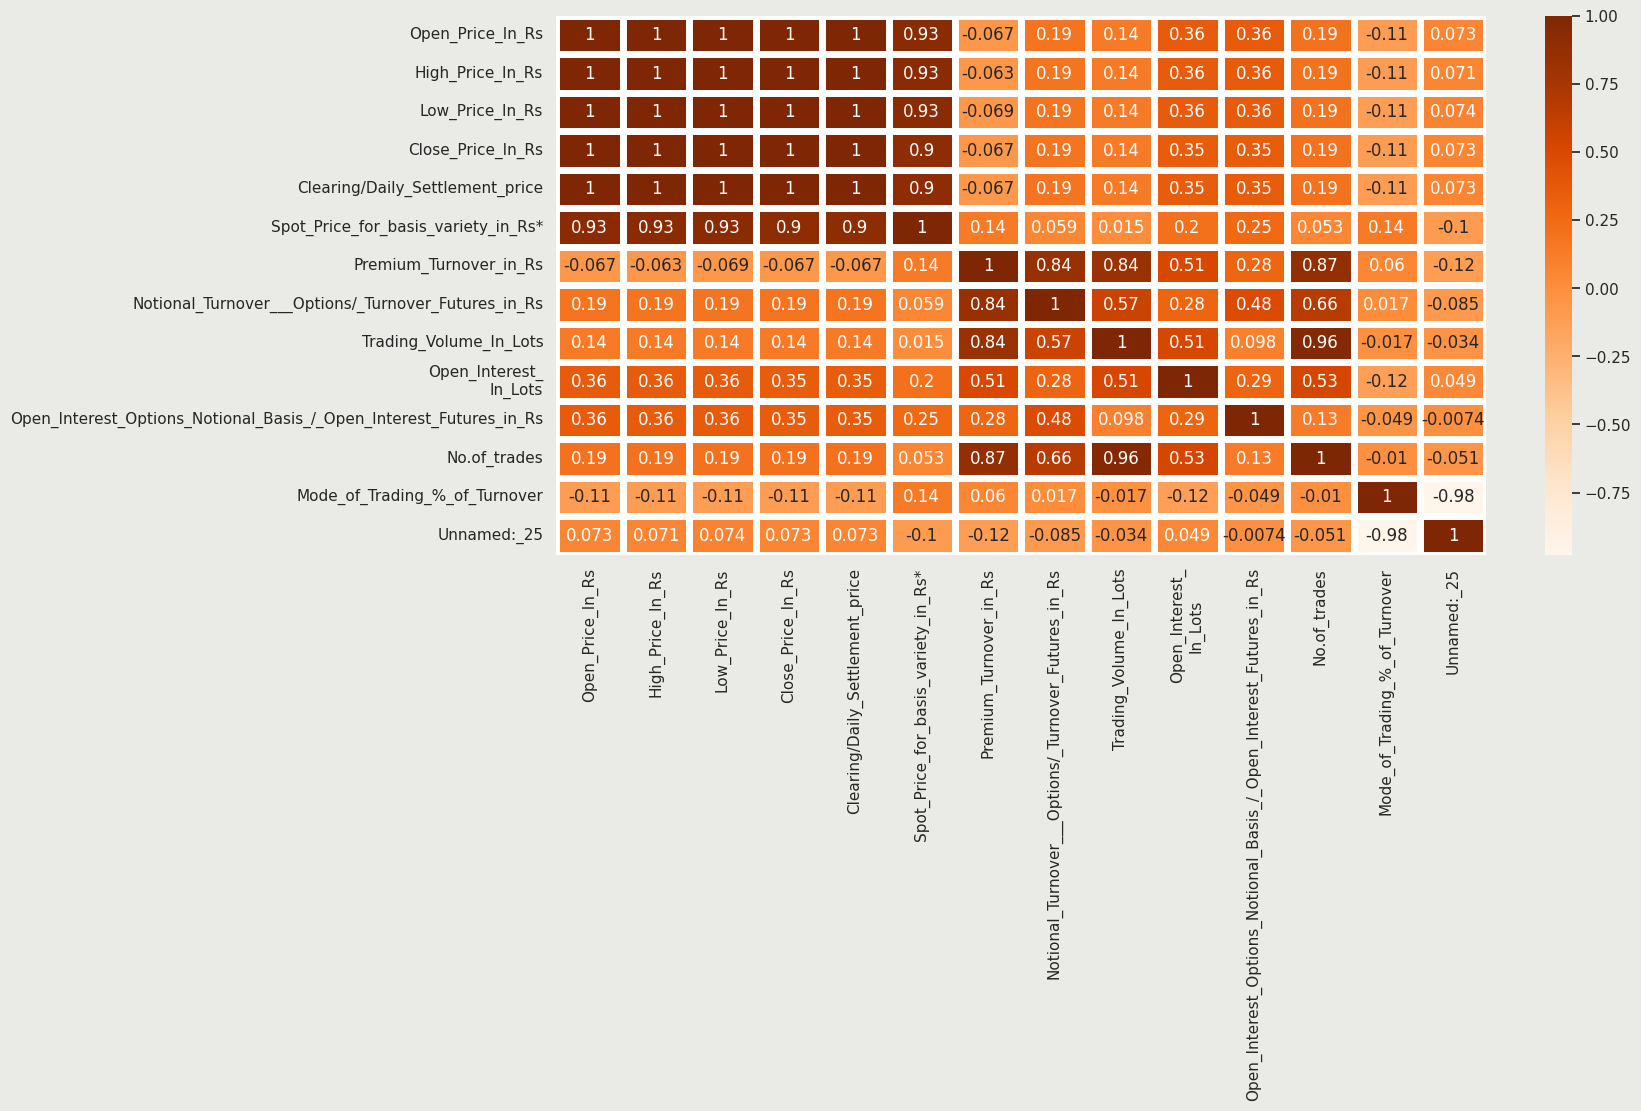

In [ ]:
 # printing correlation for the dataframe with better visualization.
 plt.figure(figsize = [15, 7], clear = True, facecolor = '#EAEAE6')
 sns.heatmap(df.corr(), annot = True, square = False, linewidths = 5,
             linecolor = "white", cmap = "Oranges");

In [ ]:
# Finding the sum of null values present in 'Trading_Volume_In_Lots' column.
df['Trading_Volume_In_Lots'].isnull().sum()

97671

In [ ]:
df.dropna(subset=['Trading_Volume_In_Lots','Open_Price_In_Rs'], inplace=True)
df

,Year,Month,Date,Derivative_segment,Instrument_Type,Name_of_the_commodity,Symbol,Expiry_Date,Price_unit,Option_Type,...,Spot_Price_for_basis_variety_in_Rs*,Premium_Turnover_in_Rs,Notional_Turnover___Options/_Turnover_Futures_in_Rs,Trading_Volume_In_Lots,Open_Interest_\nIn_Lots,Lot_size_and_unit,Open_Interest_Options_Notional_Basis_/_Open_Interest_Futures_in_Rs,No.of_trades,Mode_of_Trading_%_of_Turnover,Unnamed:_25
3,2020,Mar,2020-03-02 00:00:00,Commodity Derivatives,FUTCOM,ALUMINIUM MINI,ALUMINI,2020-03-31 00:00:00,1 KGS,0,...,139.1,NaN,1.730445e+09,12537.0,4375.0,1 MT,606375000.0,8036.0,20.607302,79.392698
4,2020,Mar,2020-03-02 00:00:00,Commodity Derivatives,FUTCOM,ALUMINIUM MINI,ALUMINI,2020-04-30 00:00:00,1 KGS,0,...,139.1,NaN,6.080455e+07,439.0,201.0,1 MT,27979200.0,408.0,40.778322,59.221678
6,2020,Mar,2020-03-02 00:00:00,Commodity Derivatives,FUTCOM,CARDAMOM,CARDAMOM,2020-03-13 00:00:00,1 KGS,0,...,3062.5,NaN,2.228440e+06,8.0,60.0,100 KGS,16713600.0,8.0,NaN,100.000000
7,2020,Mar,2020-03-02 00:00:00,Commodity Derivatives,FUTCOM,CARDAMOM,CARDAMOM,2020-04-15 00:00:00,1 KGS,0,...,3062.5,NaN,1.151330e+06,4.0,58.0,100 KGS,16694140.0,4.0,NaN,100.000000
10,2020,Mar,2020-03-02 00:00:00,Commodity Derivatives,OPTFUT,COPPER,COPPER,2020-03-20 00:00:00,1 KGS,CE,...,NaN,16650.0,1.079150e+06,1.0,2.0,2500 KGS,2158300.0,1.0,50.000000,50.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4945,Note:,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.000000e+00,0.0,0.0,0,0.0,0.0,0.000000,0.000000
4946,Contracts with no volume and no Open Interest ...,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.000000e+00,0.0,0.0,0,0.0,0.0,0.000000,0.000000
4947,Spot price is not provided in case of Option C...,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.000000e+00,0.0,0.0,0,0.0,0.0,0.000000,0.000000
4948,In case of international referenceable commodi...,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.000000e+00,0.0,0.0,0,0.0,0.0,0.000000,0.000000


In [ ]:
list(df.columns)

['Year',
 'Month',
 'Date',
 'Derivative_segment',
 'Instrument_Type',
 'Name_of_the_commodity',
 'Symbol',
 'Expiry_Date',
 'Price_unit',
 'Option_Type',
 'Strike_Price_In_Rs',
 'Open_Price_In_Rs',
 'High_Price_In_Rs',
 'Low_Price_In_Rs',
 'Close_Price_In_Rs',
 'Clearing/Daily_Settlement_price',
 'Spot_Price_for_basis_variety_in_Rs*',
 'Premium_Turnover_in_Rs',
 'Notional_Turnover___Options/_Turnover_Futures_in_Rs',
 'Trading_Volume_In_Lots',
 'Open_Interest_\nIn_Lots',
 'Lot_size_and_unit',
 'Open_Interest_Options_Notional_Basis_/_Open_Interest_Futures_in_Rs',
 'No.of_trades',
 'Mode_of_Trading_%_of_Turnover',
 'Unnamed:_25']

In [ ]:
# filtering the commodity for silver and storing it in 'df1'
df1 = df[(df['Name_of_the_commodity'] == 'SILVER')]
df1

,Year,Month,Date,Derivative_segment,Instrument_Type,Name_of_the_commodity,Symbol,Expiry_Date,Price_unit,Option_Type,...,Spot_Price_for_basis_variety_in_Rs*,Premium_Turnover_in_Rs,Notional_Turnover___Options/_Turnover_Futures_in_Rs,Trading_Volume_In_Lots,Open_Interest_\nIn_Lots,Lot_size_and_unit,Open_Interest_Options_Notional_Basis_/_Open_Interest_Futures_in_Rs,No.of_trades,Mode_of_Trading_%_of_Turnover,Unnamed:_25
214,2020,Mar,2020-03-02 00:00:00,Commodity Derivatives,FUTCOM,SILVER,SILVER,2020-03-05 00:00:00,1 KGS,0,...,45015.0,NaN,64390050.0,48.0,131.0,30 KGS,175124730.0,46.0,37.524338,62.475662
215,2020,Mar,2020-03-02 00:00:00,Commodity Derivatives,OPTFUT,SILVER,SILVER,2020-04-28 00:00:00,1 KGS,CE,...,NaN,108990.0,1368990.0,1.0,2.0,30 KGS,2737980.0,1.0,50.000000,50.000000
217,2020,Mar,2020-03-02 00:00:00,Commodity Derivatives,OPTFUT,SILVER,SILVER,2020-04-28 00:00:00,1 KGS,CE,...,NaN,68505.0,1373505.0,1.0,1.0,30 KGS,1373505.0,1.0,50.000000,50.000000
218,2020,Mar,2020-03-02 00:00:00,Commodity Derivatives,OPTFUT,SILVER,SILVER,2020-04-28 00:00:00,1 KGS,CE,...,NaN,366795.0,8286795.0,6.0,15.0,30 KGS,20717100.0,5.0,50.000000,50.000000
220,2020,Mar,2020-03-02 00:00:00,Commodity Derivatives,OPTFUT,SILVER,SILVER,2020-04-28 00:00:00,1 KGS,CE,...,NaN,4630020.0,143680020.0,103.0,61.0,30 KGS,84880890.0,71.0,43.190890,56.809110
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4882,2021,September,2021-09-30 00:00:00,Commodity Derivatives,OPTFUT,SILVER,SILVER,2021-11-24 00:00:00,1 KGS,PE,...,NaN,2693655.0,62093655.0,33.0,111.0,30 KGS,207483975.0,22.0,51.510951,48.489049
4884,2021,September,2021-09-30 00:00:00,Commodity Derivatives,OPTFUT,SILVER,SILVER,2021-11-24 00:00:00,1 KGS,PE,...,NaN,2639385.0,46559385.0,24.0,85.0,30 KGS,164800125.0,14.0,52.065862,47.934138
4886,2021,September,2021-09-30 00:00:00,Commodity Derivatives,OPTFUT,SILVER,SILVER,2021-11-24 00:00:00,1 KGS,PE,...,NaN,109200.0,1969200.0,1.0,36.0,30 KGS,70891200.0,1.0,50.000000,50.000000
4888,2021,September,2021-09-30 00:00:00,Commodity Derivatives,OPTFUT,SILVER,SILVER,2021-11-24 00:00:00,1 KGS,PE,...,NaN,1370460.0,18380460.0,9.0,88.0,30 KGS,179720640.0,5.0,55.574752,44.425248


In [ ]:
# dropping duplicates in column 'month' and storing it in 'df2'
df2 = df1.drop_duplicates(subset='Month')
df2


,Year,Month,Date,Derivative_segment,Instrument_Type,Name_of_the_commodity,Symbol,Expiry_Date,Price_unit,Option_Type,...,Spot_Price_for_basis_variety_in_Rs*,Premium_Turnover_in_Rs,Notional_Turnover___Options/_Turnover_Futures_in_Rs,Trading_Volume_In_Lots,Open_Interest_\nIn_Lots,Lot_size_and_unit,Open_Interest_Options_Notional_Basis_/_Open_Interest_Futures_in_Rs,No.of_trades,Mode_of_Trading_%_of_Turnover,Unnamed:_25
214,2020,Mar,2020-03-02 00:00:00,Commodity Derivatives,FUTCOM,SILVER,SILVER,2020-03-05 00:00:00,1 KGS,0,...,45015.0,NaN,6.439005e+07,48.0,131.0,30 KGS,1.751247e+08,46.0,37.524338,62.475662
160,2018,October,2018-10-01 00:00:00,Commodity Derivatives,FUTCOM,SILVER,SILVER,2018-12-05 00:00:00,1 KGS,0,...,37777.0,NaN,2.456414e+10,21350.0,22755.0,30 KGS,2.624448e+10,15948.0,33.712028,66.287972
170,2018,July,2018-07-02 00:00:00,Commodity Derivatives,FUTCOM,SILVER,SILVER,2018-07-05 00:00:00,1 KGS,0,...,39105.0,NaN,2.695054e+09,2308.0,978.0,30 KGS,1.133610e+09,1579.0,19.652790,80.347210
147,2019,Nov,2019-11-01 00:00:00,Commodity Derivatives,OPTFUT,SILVER,SILVER,2019-11-27 00:00:00,1 KGS,CE,...,NaN,390060.0,2.790060e+06,2.0,5.0,30 KGS,6.975150e+06,1.0,100.000000,NaN
227,2023,March,2023-03-01 00:00:00,Commodity Derivatives,FUTCOM,SILVER,SILVER,2023-03-03 00:00:00,1 KGS,0,...,63985.0,NaN,4.931452e+08,257.0,329.0,30 KGS,6.310384e+08,232.0,28.995287,71.004713
185,2018,November,2018-11-01 00:00:00,Commodity Derivatives,FUTCOM,SILVER,SILVER,2018-12-05 00:00:00,1 KGS,0,...,37884.0,NaN,3.011454e+10,26115.0,24031.0,30 KGS,2.795118e+10,19340.0,29.985846,70.014154
99,2020,August,2020-08-03 00:00:00,Commodity Derivatives,FUTCOM,SILVER,SILVER,2020-09-04 00:00:00,1 KGS,0,...,NaN,NaN,6.604163e+10,33544.0,13030.0,30 KGS,2.570089e+10,29320.0,47.792615,52.207385
155,2019,Apr,2019-04-01 00:00:00,Commodity Derivatives,OPTFUT,SILVER,SILVER,2019-04-26 00:00:00,1 KGS,CE,...,NaN,53985.0,2.273985e+06,2.0,21.0,30 KGS,2.387700e+07,2.0,50.000000,50.000000
155,2019,Oct,2019-10-01 00:00:00,Commodity Derivatives,OPTFUT,SILVER,SILVER,2019-11-27 00:00:00,1 KGS,CE,...,NaN,196050.0,2.716050e+06,2.0,5.0,30 KGS,6.790125e+06,2.0,50.000000,50.000000
229,2023,January,2023-01-02 00:00:00,Commodity Derivatives,FUTCOM,SILVER,SILVER,2023-03-03 00:00:00,1 KGS,0,...,68139.0,NaN,7.899018e+09,3784.0,21424.0,30 KGS,4.471467e+10,3066.0,15.247486,84.752514


Exploratory Data Analysis(EDA)

<Axes: xlabel='Open_Price_In_Rs', ylabel='High_Price_In_Rs'>

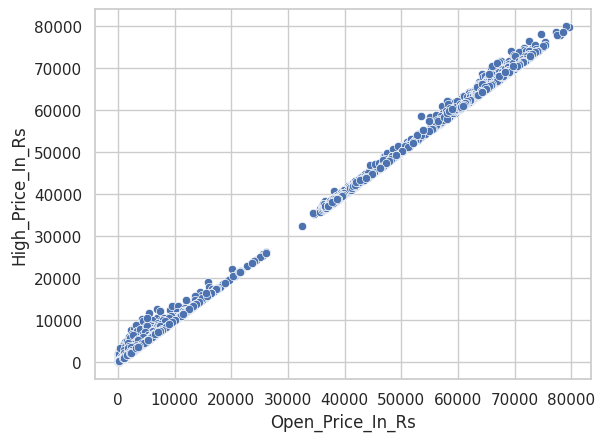

In [ ]:
#plotting scatterplot for "Open_Price_In_Rs" and "High_Price_In_Rs".
sns.scatterplot(data=df1, x="Open_Price_In_Rs", y='High_Price_In_Rs')

<Axes: xlabel='Low_Price_In_Rs', ylabel='High_Price_In_Rs'>

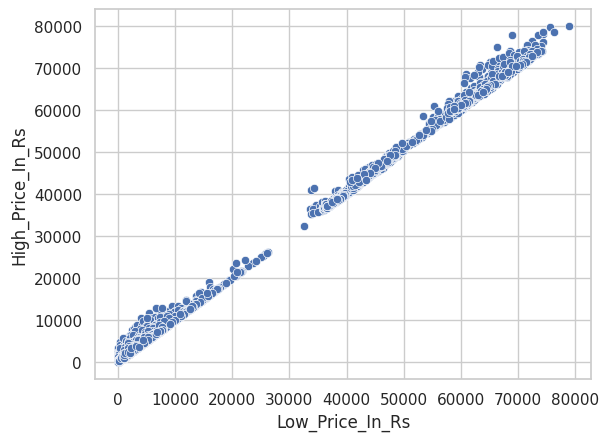

In [ ]:
#plotting scatterplot for "Low_Price_In_Rs" and "High_Price_In_Rs".
sns.scatterplot(data=df1, x='Low_Price_In_Rs', y='High_Price_In_Rs')

<Axes: xlabel='Close_Price_In_Rs', ylabel='High_Price_In_Rs'>

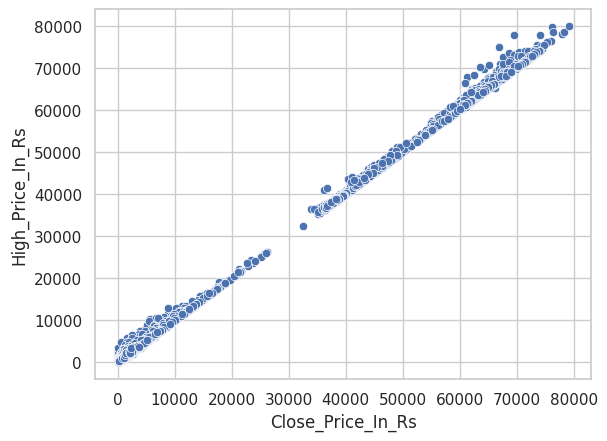

In [ ]:
#plotting scatterplot for "Close_Price_In_Rs" and "High_Price_In_Rs".
sns.scatterplot(data=df1, x="Close_Price_In_Rs", y='High_Price_In_Rs')

<Axes: xlabel='Month'>

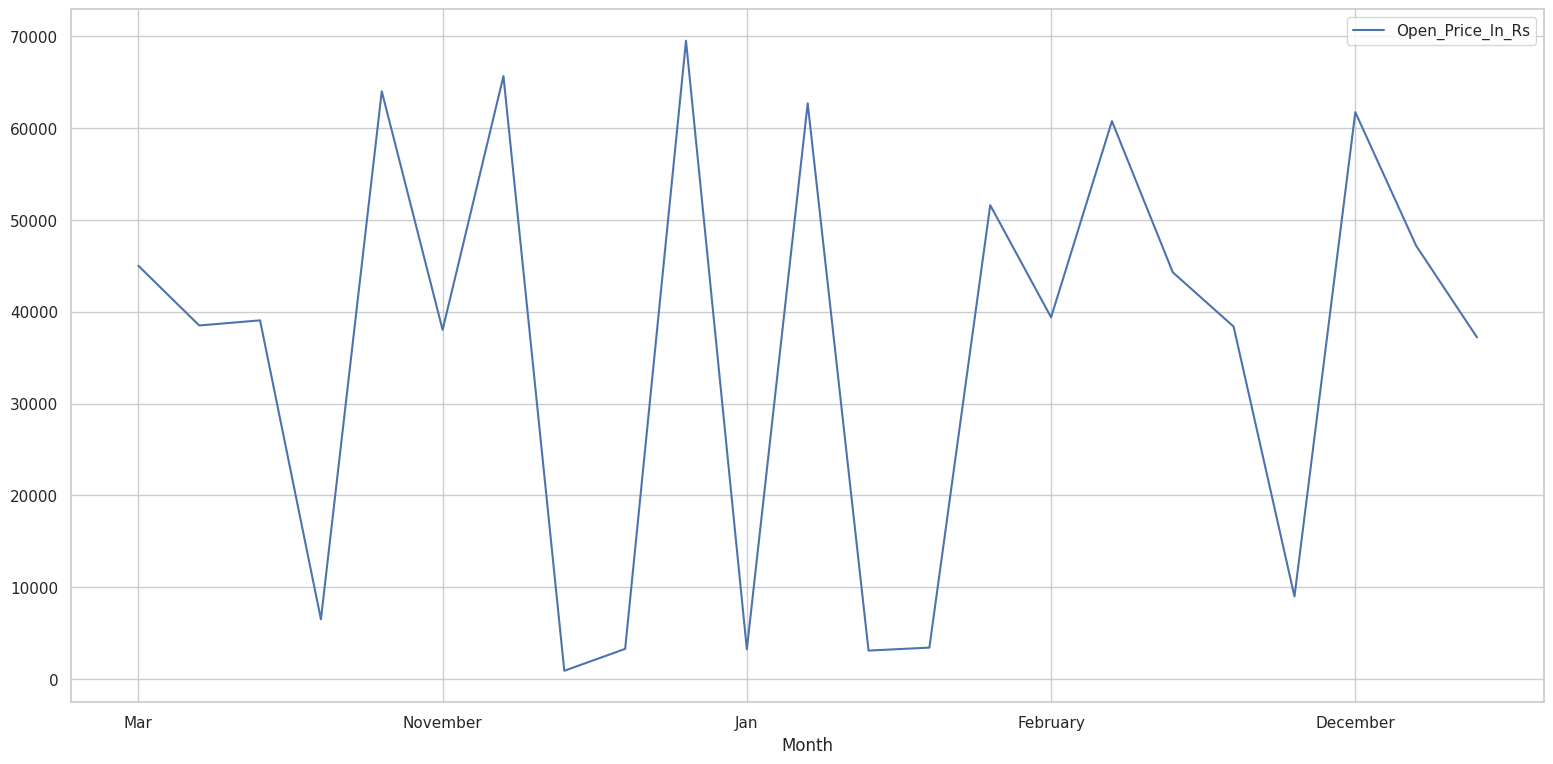

In [ ]:
#finding a relation between "open_price" and "month" column through line graph
df2.plot(x="Month", y=["Open_Price_In_Rs"], kind="line", figsize=(19, 9))

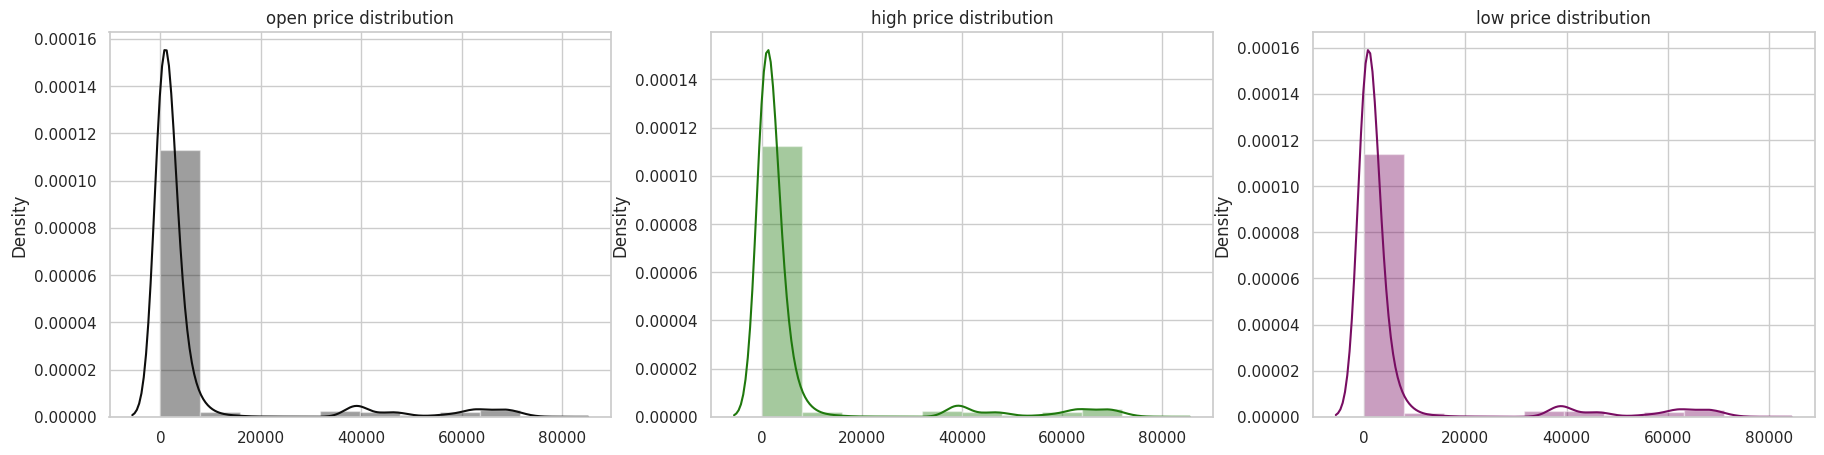

In [ ]:
#This is the sns distribution plots for open_price,high_price,low_price distributions with density value.
fig, axes = plt.subplots(1, 3, figsize = (22, 5))

sns.distplot(ax = axes[0], x = df1["Open_Price_In_Rs"], hist = True, bins = 10, kde = True,
             vertical = False, color = "#0E0E0D").set(title = "open price distribution");

sns.distplot(ax = axes[1], x = df1["High_Price_In_Rs"], hist = True, bins = 10, kde = True,
             vertical = False, color = "#1F780D").set(title = "high price distribution");

sns.distplot(ax = axes[2], x = df1["Low_Price_In_Rs"], hist = True, bins = 10, kde = True,
             vertical = False, color = "#780D62").set(title = "low price distribution");

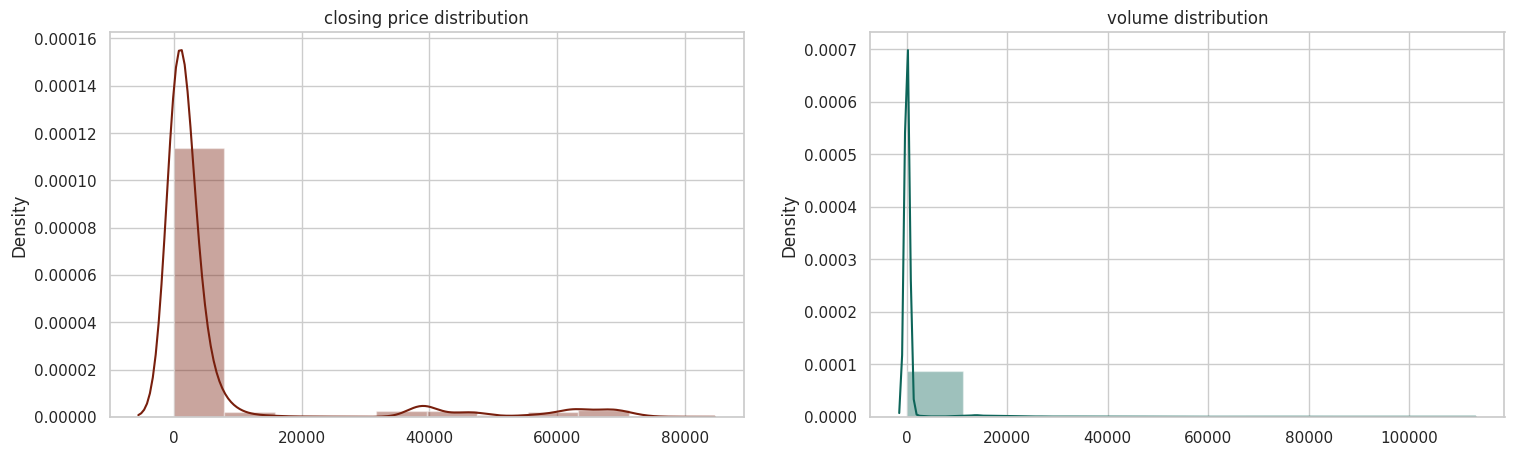

In [ ]:
#This is another representation of sns distribution plot for close_price,volume distribution
fig, axes = plt.subplots(1, 2, figsize = (18, 5))

sns.distplot(ax = axes[0], x = df1["Close_Price_In_Rs"], hist = True, bins = 10, kde = True,
             vertical = False, color = "#781F0D").set(title = "closing price distribution");

sns.distplot(ax = axes[1], x = df1["Trading_Volume_In_Lots"], hist = True, bins = 10, kde = True,
             vertical = False, color = "#0D6559").set(title = "volume distribution");

In [ ]:
fig = px.histogram(df, x = "Close_Price_In_Rs", y = "Trading_Volume_In_Lots", marginal = "box", text_auto = True, template = "plotly_dark", hover_data  = df1.columns)
fig.show()

In [ ]:
#This are the libraries that are used for random forest and some machine learning models like linear regression,knn
import sklearn.metrics as metrics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM

In [ ]:
#Here we are created two variables of X&Y two give the targetted features and targeted value variable Y
X = df1[['Open_Price_In_Rs','Low_Price_In_Rs','Close_Price_In_Rs']]
Y = df1['High_Price_In_Rs']
print(X)
print(Y)

      Open_Price_In_Rs  Low_Price_In_Rs  Close_Price_In_Rs
214            45002.0          44337.0            44561.0
215             3633.0           3633.0             3633.0
217             2283.5           2283.5             2283.5
218             2200.0           2000.0             2038.0
220             1490.0           1330.0             1383.0
...                ...              ...                ...
4882            3159.5           2234.0             2307.5
4884            3750.5           3123.5             3627.5
4886            3640.0           3640.0             3640.0
4888            5311.0           4370.0             5076.0
4892            7050.0           6820.0             6906.5

[35772 rows x 3 columns]
214     45002.0
215      3633.0
217      2283.5
218      2200.0
220      1745.0
         ...   
4882     3268.0
4884     3750.5
4886     3640.0
4888     5311.0
4892     7074.5
Name: High_Price_In_Rs, Length: 35772, dtype: float64


In [ ]:
#Here we can print the data of our data frame that we are using for training and evaluating the models for gold price
df1

,Year,Month,Date,Derivative_segment,Instrument_Type,Name_of_the_commodity,Symbol,Expiry_Date,Price_unit,Option_Type,...,Spot_Price_for_basis_variety_in_Rs*,Premium_Turnover_in_Rs,Notional_Turnover___Options/_Turnover_Futures_in_Rs,Trading_Volume_In_Lots,Open_Interest_\nIn_Lots,Lot_size_and_unit,Open_Interest_Options_Notional_Basis_/_Open_Interest_Futures_in_Rs,No.of_trades,Mode_of_Trading_%_of_Turnover,Unnamed:_25
214,2020,Mar,2020-03-02 00:00:00,Commodity Derivatives,FUTCOM,SILVER,SILVER,2020-03-05 00:00:00,1 KGS,0,...,45015.0,NaN,64390050.0,48.0,131.0,30 KGS,175124730.0,46.0,37.524338,62.475662
215,2020,Mar,2020-03-02 00:00:00,Commodity Derivatives,OPTFUT,SILVER,SILVER,2020-04-28 00:00:00,1 KGS,CE,...,NaN,108990.0,1368990.0,1.0,2.0,30 KGS,2737980.0,1.0,50.000000,50.000000
217,2020,Mar,2020-03-02 00:00:00,Commodity Derivatives,OPTFUT,SILVER,SILVER,2020-04-28 00:00:00,1 KGS,CE,...,NaN,68505.0,1373505.0,1.0,1.0,30 KGS,1373505.0,1.0,50.000000,50.000000
218,2020,Mar,2020-03-02 00:00:00,Commodity Derivatives,OPTFUT,SILVER,SILVER,2020-04-28 00:00:00,1 KGS,CE,...,NaN,366795.0,8286795.0,6.0,15.0,30 KGS,20717100.0,5.0,50.000000,50.000000
220,2020,Mar,2020-03-02 00:00:00,Commodity Derivatives,OPTFUT,SILVER,SILVER,2020-04-28 00:00:00,1 KGS,CE,...,NaN,4630020.0,143680020.0,103.0,61.0,30 KGS,84880890.0,71.0,43.190890,56.809110
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4882,2021,September,2021-09-30 00:00:00,Commodity Derivatives,OPTFUT,SILVER,SILVER,2021-11-24 00:00:00,1 KGS,PE,...,NaN,2693655.0,62093655.0,33.0,111.0,30 KGS,207483975.0,22.0,51.510951,48.489049
4884,2021,September,2021-09-30 00:00:00,Commodity Derivatives,OPTFUT,SILVER,SILVER,2021-11-24 00:00:00,1 KGS,PE,...,NaN,2639385.0,46559385.0,24.0,85.0,30 KGS,164800125.0,14.0,52.065862,47.934138
4886,2021,September,2021-09-30 00:00:00,Commodity Derivatives,OPTFUT,SILVER,SILVER,2021-11-24 00:00:00,1 KGS,PE,...,NaN,109200.0,1969200.0,1.0,36.0,30 KGS,70891200.0,1.0,50.000000,50.000000
4888,2021,September,2021-09-30 00:00:00,Commodity Derivatives,OPTFUT,SILVER,SILVER,2021-11-24 00:00:00,1 KGS,PE,...,NaN,1370460.0,18380460.0,9.0,88.0,30 KGS,179720640.0,5.0,55.574752,44.425248


In [ ]:
df1.shape

(35772, 26)

In [ ]:
# 20% data is taken into test and 80% into train data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=2)
X_train
Y_train


4403    1435.0
2682    9900.0
1596      62.5
165     1756.0
2808    1830.0
         ...  
3175       3.0
4343    1069.0
1805    3381.5
806      963.5
3366    2078.5
Name: High_Price_In_Rs, Length: 28617, dtype: float64

In [ ]:
X_train

,Open_Price_In_Rs,Low_Price_In_Rs,Close_Price_In_Rs
4403,1400.0,1400.0,1413.0
2682,9900.0,9900.0,9900.0
1596,53.5,40.0,56.5
165,1749.5,1749.5,1753.0
2808,1219.0,1042.5,1790.5
...,...,...,...
3175,3.0,3.0,3.0
4343,1069.0,784.5,807.5
1805,3381.5,3257.5,3316.5
806,963.5,963.5,963.5


In [ ]:
Y_train

4403    1435.0
2682    9900.0
1596      62.5
165     1756.0
2808    1830.0
         ...  
3175       3.0
4343    1069.0
1805    3381.5
806      963.5
3366    2078.5
Name: High_Price_In_Rs, Length: 28617, dtype: float64

In [ ]:
X_test

,Open_Price_In_Rs,Low_Price_In_Rs,Close_Price_In_Rs
3544,650.0,650.0,763.0
1494,5170.0,2318.0,4219.5
4005,1794.5,1761.0,1778.0
3499,72.0,28.0,57.0
1233,332.0,332.0,332.0
...,...,...,...
5214,2010.5,1933.0,1967.5
3637,2181.0,1695.0,1801.5
154,421.0,333.0,363.0
4073,5049.5,4179.5,4770.0


In [ ]:
X_test.shape

(7155, 3)

In [ ]:
Y_test

3544     842.0
1494    5170.0
4005    1794.5
3499      73.5
1233     332.0
         ...  
5214    2010.5
3637    2181.0
154      435.0
4073    5080.5
2588     496.0
Name: High_Price_In_Rs, Length: 7155, dtype: float64

Linear Regression Model


In [ ]:
# Model training: Linear Regression
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression() 
lr_model.fit(X_train,Y_train)
lr_pred = lr_model.predict(X_test)
error_score = metrics.r2_score(Y_test,lr_pred)
print("R squared score for Linear regression is : ", error_score)

R squared score for Linear regression is :  0.9998670504285936


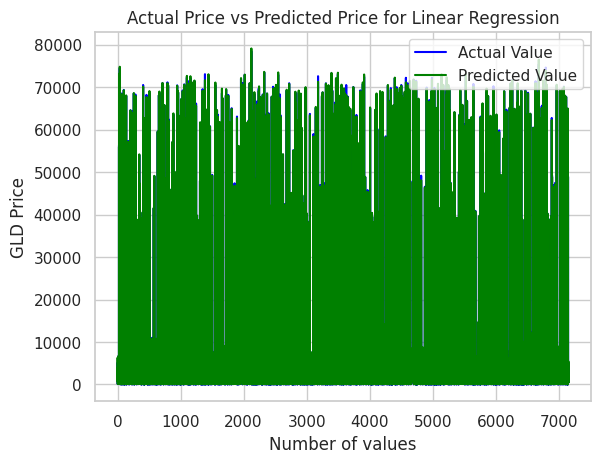

In [ ]:
# Actual and predicted values plot for Linear Regression
Y_test = list(Y_test)
plt.plot(Y_test, color='blue', label = 'Actual Value')
plt.plot(lr_pred, color='green', label='Predicted Value')
plt.title('Actual Price vs Predicted Price for Linear Regression')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()

In [ ]:
# Model training: Decision Tree
from sklearn.tree import DecisionTreeRegressor
dt_model=DecisionTreeRegressor()
dt_model.fit(X_train,Y_train)
dt_pred = dt_model.predict(X_test)
error_score = metrics.r2_score(Y_test,dt_pred)
print("R squared score for Decision tree is : ", error_score)

R squared score for Decision tree is :  0.9998022306913203


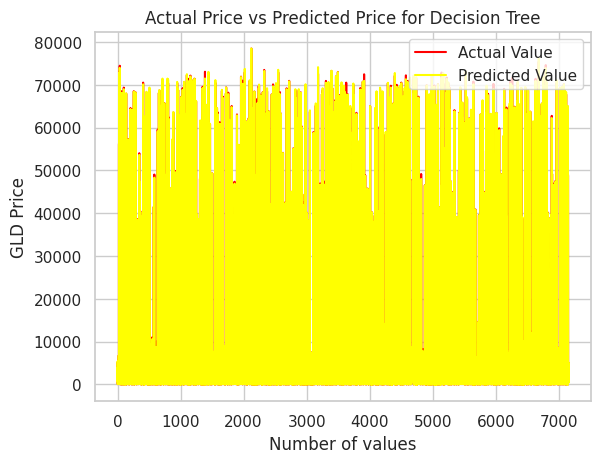

In [ ]:

# Actual and predicted values plot for Decision Tree
Y_test = list(Y_test)
plt.plot(Y_test, color='red', label = 'Actual Value')
plt.plot(dt_pred, color='yellow', label='Predicted Value')
plt.title('Actual Price vs Predicted Price for Decision Tree')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()

In [ ]:
# Model training: KNN
from sklearn.neighbors import KNeighborsRegressor
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train,Y_train)
knn_pred = knn_model.predict(X_test)
error_score = metrics.r2_score(Y_test,knn_pred)
print("R squared score for KNN is : ", error_score)

R squared score for KNN is :  0.9998608978618216


In [ ]:
model_trainer = RandomForestRegressor(n_estimators=150)
model_trainer.fit(X_train,Y_train)

RandomForestRegressor(n_estimators=150)

In [ ]:
# X_test prediction making code
test_data_prediction = model_trainer.predict(X_test)

In [ ]:
# X_test predictions printing
test_data_prediction

array([ 818.40333333, 5197.35333333, 1852.55333333, ...,  427.93      ,
       5293.59666667,  506.54333333])

In [ ]:
# Y_train prediction
train_data_prediction=model_trainer.predict(X_train)

In [ ]:
train_data_prediction

array([1434.53      , 9944.06666667,   63.95222222, ..., 3382.13      ,
        963.16666667, 2106.98      ])

In [ ]:
Y_test = list(Y_test)


In [ ]:
print(Y_test)

[842.0, 5170.0, 1794.5, 73.5, 332.0, 1450.0, 4010.0, 228.0, 1409.5, 1805.0, 173.5, 246.0, 230.0, 1039.5, 5336.5, 1954.0, 2003.0, 1500.0, 275.5, 6736.5, 505.5, 5738.5, 2488.0, 56280.0, 425.0, 6412.0, 1148.0, 6501.0, 1450.0, 98.0, 1616.5, 2659.5, 5928.0, 73199.0, 826.0, 74480.0, 1017.0, 250.0, 65770.0, 326.5, 610.5, 540.0, 1153.0, 250.0, 5.0, 3208.5, 1050.0, 130.0, 2811.5, 269.5, 2185.0, 5349.0, 1460.5, 844.0, 9624.5, 114.5, 1613.0, 462.0, 4726.5, 2880.5, 235.0, 1179.0, 551.0, 40.0, 11326.5, 68526.0, 4142.5, 652.0, 505.0, 52072.0, 5.5, 300.0, 3356.5, 600.0, 51.5, 28.5, 126.5, 164.5, 418.5, 1045.0, 153.0, 4626.0, 557.5, 3550.0, 3689.0, 1738.5, 3597.0, 4695.0, 2332.0, 2430.0, 725.5, 860.0, 586.0, 530.0, 2866.0, 8370.5, 1034.0, 3500.0, 959.0, 69364.0, 6.5, 3253.0, 361.0, 1148.0, 825.5, 40998.0, 4.5, 4676.0, 24.5, 2030.0, 3494.0, 1580.0, 516.0, 1645.0, 267.0, 585.0, 63.0, 333.5, 799.0, 565.0, 38480.0, 1650.0, 78.0, 5733.0, 2550.0, 1913.0, 482.5, 5888.0, 2350.0, 36456.0, 525.0, 1350.0, 2116.5

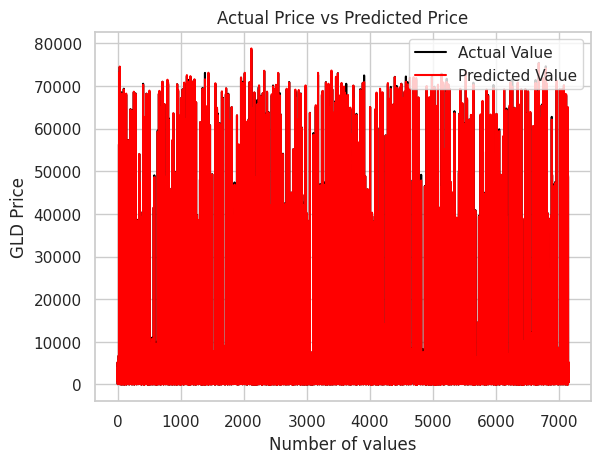

In [ ]:
plt.plot(Y_test, color='black', label = 'Actual Value')
plt.plot(test_data_prediction, color='red', label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()

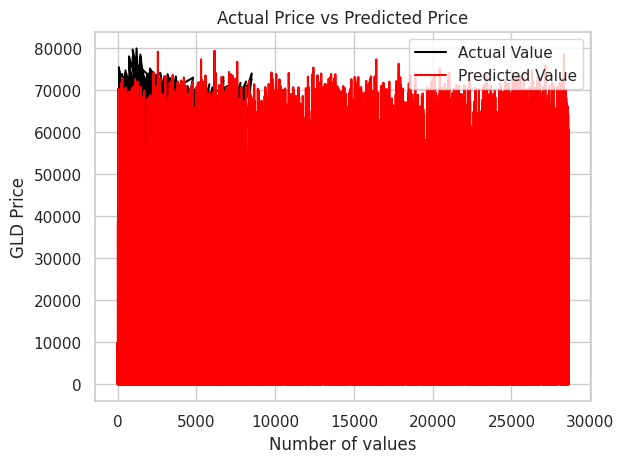

In [ ]:
#train dataset comparision between Actual price and predcited price
plt.plot(Y_train, color='black', label = 'Actual Value')
plt.plot(train_data_prediction, color='red', label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()

In [ ]:
#reshaping the data of predicted and actuall values into the rage of -1 to 1 of the train dataset
Y_train= np.array(Y_train)
train_data_prediction = np.array(train_data_prediction)

Y_train = np.reshape(Y_train, (-1, 1))
train_data_prediction = np.reshape(train_data_prediction, (-1, 1))
model_trainer.score(X_train, Y_train)

0.9999846830420135

In [ ]:
#Measuring the RMSE score and R Squared error for train dataset.
error_score = metrics.r2_score(Y_train, train_data_prediction)
print("R squared error : ", error_score)

rmse = np.sqrt(np.mean(((train_data_prediction - Y_train) ** 2)))
print("RMSE score of the model:", rmse)

R squared error :  0.9999846830420135
RMSE score of the model: 59.63789299429286


In [ ]:
#reshaping the data of predicted and actuall values in the rage of -1 to 1 of the test dataset
Y_test = np.array(Y_test)
test_data_prediction = np.array(test_data_prediction)

Y_test = np.reshape(Y_test, (-1, 1))
test_data_prediction = np.reshape(test_data_prediction, (-1, 1))
model_trainer.score(X_test, Y_test)

0.9998820408778295

In [ ]:
#Measuring the RMSE score and R Squared error for test data set
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared error : ", error_score)

rmse = np.sqrt(np.mean(((test_data_prediction - Y_test) ** 2)))
print("RMSE score of the model:", rmse)

R squared error :  0.9998820408778295
RMSE score of the model: 166.91461318629857


In [ ]:
#converting the ipynb file into pickel file.
import os
import sys
import pickle

projectabspathname = os.path.abspath('projectname.pickle')
print(projectabspathname)
projectname = 'projectname.ipynb'
projectpickle = open(str(projectabspathname),'wb')
pickle.dump(model_trainer, projectpickle)
projectpickle.close()

/content/projectname.pickle


In [ ]:
#dumping the pickel files
pickle.dump(model_trainer,open('/content/sample_data/Silver.pkl','wb'))

In [ ]:
#loading all the pickel files
x=pickle.load(open('/content/sample_data/Silver.pkl','rb'))

In [ ]:
#predicting the current day high values by taking the inputs as 
x.predict([[33080,37800,39800]])

array([39318.7])